In [23]:
from ecell4 import *
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plt
rng = core.GSLRandomNumberGenerator()

def getN(r,L):
    H = 3*r*2
    w1 = spatiocyte.SpatiocyteWorld(Real3(H,L,L),r,rng)
    cs = w1.row_size()
    ls = w1.layer_size()
    return cs*ls

phi = 0.1#,0.15,0.18]#[0.1,0.2,0.3,0.45,0.5]
rm = 0.005
L = 2000*rm
g1 = 1./0.818#0.774
g2 = 0.5/0.25


In [24]:
gamma = g2
At = L*L
Ap = math.pi*rm*rm
Nv = At/Ap/gamma
rv = L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)
print 'estimated rv',rv
print 'factor',rv/rm
Nt = int(phi*At/Ap)
Nmv = getN(rv,L)
print 'Nv',Nmv
print 'phiBD',Nt*Ap/At
print 'phiLS',float(Nt)/Nmv    
print 'ratio',(Nt*Ap/At)*gamma/(float(Nt)/Nmv )

estimated rv 0.00674231867876
factor 1.34846373575
Nv 638352
phiBD 0.0999992503583
phiLS 0.199455786149
ratio 1.0027209768


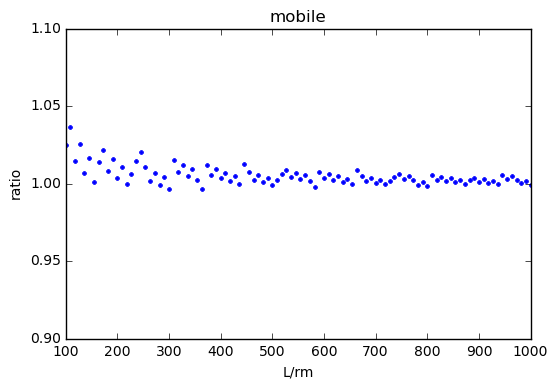

In [3]:
gamma = g1
rm = 0.005
Ls = np.linspace(0.5,5,100)
#gamma = 0.5/0.222
ratios = []
for L in Ls:
    At = L*L
    Ap = math.pi*rm*rm
    Nv = At/Ap/gamma
    rv = L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)
    Nt = int(phi*At/Ap)
    Nmv = getN(rv,L)
    ratio = (Nt*Ap/At)*gamma/(float(Nt)/Nmv )
    ratios.append(ratio)
plt.plot(Ls/rm,ratios,'.')
plt.ylim(0.9,1.1)
plt.title('mobile')
plt.ylabel('ratio')
plt.xlabel('L/rm')
#const = (6*(2**0.5)+ 4*(3**0.5) + 3*(6**0.5))/72
#print const*(1./0.774)**0.5


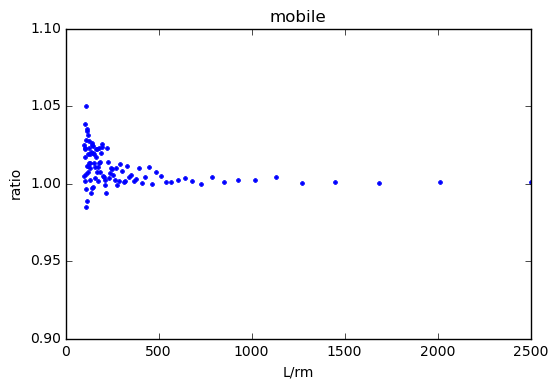

In [4]:
gamma = g1
R = np.linspace(0.002,0.05,100)
Ls = 1.
#gamma = 0.5/0.222
factors = []
ratios = []
for rm in R:
    At = L*L
    Ap = math.pi*rm*rm
    Nv = At/Ap/gamma
    rv = L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)
    Nt = int(phi*At/Ap)
    Nmv = getN(rv,L)
    ratio = (Nt*Ap/At)*gamma/(float(Nt)/Nmv )
    ratios.append(ratio)
plt.plot([L/j for j in R],ratios,'.')
plt.ylim(0.9,1.1)
plt.title('mobile')
plt.ylabel('ratio')
plt.xlabel('L/rm')
#const = (6*(2**0.5)+ 4*(3**0.5) + 3*(6**0.5))/72
#print const*(1./0.774)**0.5


/usr/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:476: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


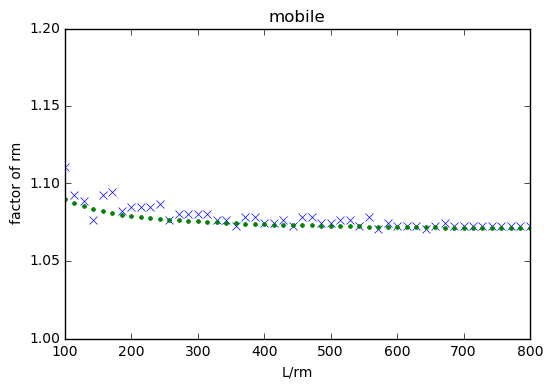

In [6]:
rm = 0.005
Ls = np.linspace(0.5,4,50)
gamma = g1
#gamma = 0.5/0.222
Ap = math.pi*rm*rm
factor = np.linspace(1,1.6,150)
rms = [rm*j for j in factor]
mf = []
mf2 = []
for L in Ls:
    At = L*L
    out = np.array([abs(1-At/Ap/gamma/getN(r,L)) for r in rms])
    minfactor = np.mean(factor[np.where(out==min(out))[0]])
    mf.append(minfactor)
    Nv = At/Ap/gamma
    mf2.append( L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)/rm)
plt.plot(Ls/rm, mf,'x')
plt.plot(Ls/rm, mf2,'.')
plt.title('mobile')
plt.xlabel('L/rm')
plt.ylabel('factor of rm')
plt.ylim(1.,1.2)
plt.legend()




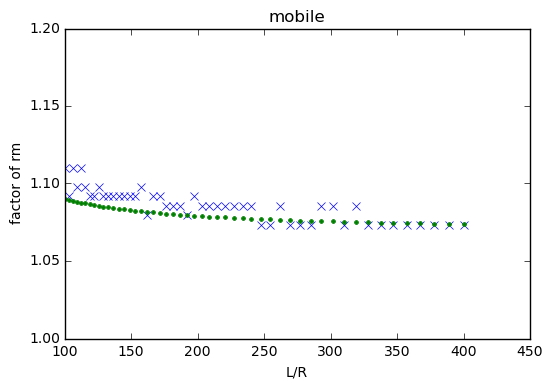

In [7]:
R = np.logspace(math.log10(0.0025),math.log10(0.01),50)
L=1.
gamma = g1
#gamma = 0.5/0.222
factor = np.linspace(1,1.6,50)
mf = []
At = L*L
mf2 = []
for rm in R:
    Ap = math.pi*rm*rm
    rms = [rm*j for j in factor]
    out = np.array([abs(1-At/Ap/gamma/getN(r,L)) for r in rms])
    minfactor = np.mean(factor[np.where(out==min(out))[0]])
    mf.append(minfactor)
    Nv = At/Ap/gamma
    mf2.append( L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)/rm)
plt.plot([L/j for j in R], mf,'x')
plt.plot([L/j for j in R], mf2,'.')
plt.title('mobile')
plt.xlabel('L/R')
plt.ylabel('factor of rm')
plt.ylim(1.,1.2)
plt.legend()

def getN(r,L):
    H = 3*r*2
    w1 = spatiocyte.SpatiocyteWorld(Real3(H,L,L),r,rng)
    cs = w1.row_size()
    ls = w1.layer_size()
    return cs*ls


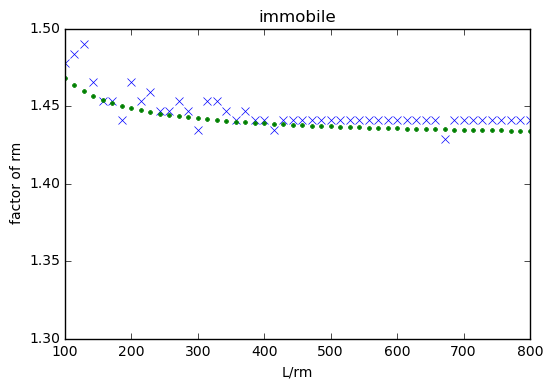

In [9]:
rm = 0.005
Ls = np.linspace(0.5,4,50)
#gamma = 1./0.774
gamma = g2
Ap = math.pi*rm*rm
factor = np.linspace(1,1.6,50)
rms = [rm*j for j in factor]
mf = []
mf2=[]
for L in Ls:
    At = L*L
    out = np.array([abs(1-At/Ap/gamma/getN(r,L)) for r in rms])
    minfactor = np.mean(factor[np.where(out==min(out))[0]])
    mf.append(minfactor)
    Nv = At/Ap/gamma
    mf2.append( L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)/rm)    
plt.plot(Ls/rm, mf,'x')
plt.plot(Ls/rm, mf2,'.')
plt.title('immobile')
plt.xlabel('L/rm')
plt.ylabel('factor of rm')
plt.ylim(1.3,1.5)
plt.legend()




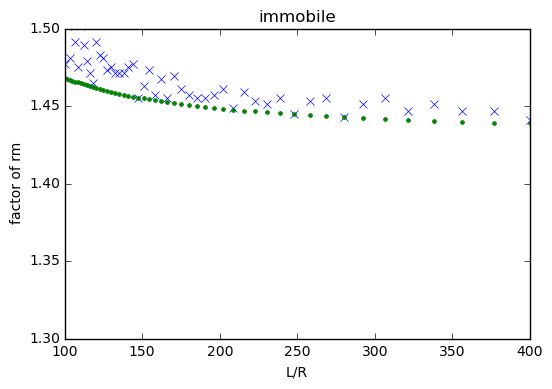

In [10]:
R = np.linspace(0.0025,0.01,50)
L=1.
#gamma = 1./0.774
gamma = g2
factor = np.linspace(1,1.6,150)
mf = []
mf2 = []
At = L*L
for rm in R:
    Ap = math.pi*rm*rm
    rms = [rm*j for j in factor]
    out = np.array([abs(1-At/Ap/gamma/getN(r,L)) for r in rms])
    minfactor = np.mean(factor[np.where(out==min(out))[0]])
    mf.append(minfactor)
    Nv = At/Ap/gamma
    mf2.append( L/((Nv)**0.5-1)/((2*(3)**0.5)**0.5)/rm)   
plt.plot([L/j for j in R], mf,'x')
plt.plot([L/j for j in R], mf2,'.')
plt.title('immobile')
plt.xlabel('L/R')
plt.ylabel('factor of rm')
plt.ylim(1.3,1.5)
plt.legend()

def getN(r,L):
    H = 3*r*2
    w1 = spatiocyte.SpatiocyteWorld(Real3(H,L,L),r,rng)
    cs = w1.row_size()
    ls = w1.layer_size()
    return cs*ls
